<a href="https://colab.research.google.com/github/veyselberk88/Data-Science-Tools-and-Ecosystem/blob/main/lec10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="./ccsf.png" alt="CCSF Logo" width=200px style="margin:0px -5px">

# Lecture 10: Histograms

Associated Textbook Sections: [7.2](https://ccsf-math-108.github.io/textbook/chapters/07/2/Visualizing_Numerical_Distributions.html)

---

## Overview

* [Distributions](#Distributions)
* [Distributions of Categorical Variables](#Distributions-of-Categorical-Variables)
* [Distributions of Numerical Variables](#Distributions-of-Numerical-Variables)
* [Area Principle](#Area-Principle)
* [Creating Histograms](#Creating-Histograms)
* [Density and Area](#Density-and-Area)

---

## Set Up the Notebook

In [ ]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

---

## Distributions

---

### Terminology

* Individuals: those whose features are recorded
* Variable: a feature, an attribute
* A variable has different values
* Values can be numerical or categorical, and of many subtypes within these
* Each individual has exactly one value of the variable
* Distribution: For each different value of the variable, the frequency of individuals that have that value

---

## Distributions of Categorical Variables

---

### Demo: Categorical Distribution

Load the `top_grosing_movies_2023.csv` data set introduced in the previous lecture.

In [ ]:
top_movies = Table.read_table('top_grossing_movies.csv')
top_movies.show(3)

Created,Modified,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Gross,Gross (Adjusted)
2023-01-06,2023-01-06,Gone with the Wind,https://www.imdb.com/title/tt0031381/,movie,8.2,238,1939,"Drama, Romance, War",318271,1939-12-15,"Sam Wood, George Cukor, Victor Fleming",402382193,7.84414e+09
2023-01-06,2023-01-06,Bambi,https://www.imdb.com/title/tt0034492/,movie,7.3,69,1942,"Animation, Adventure, Drama, Family",145676,1942-08-09,"Samuel Armstrong, Paul Satterfield, Graham Heid, James A ...",267447150,4.44602e+09
2023-01-06,2023-01-06,Titanic,https://www.imdb.com/title/tt0120338/,movie,7.9,194,1997,"Drama, Romance",1187108,1997-11-01,James Cameron,2201647264,3.71701e+09


---

The following code:
* Creates a column called `'Decade'` showing the decade that the move was originally released in.
* Reduces the table to just the columns `'Title'`, `'Year'`, `'Decade'`, `'Gross'`, and `'Gross (Adjusted)'`.
* Relabels `'Year'` as `'Release Year'`.

_This code uses NumPy's `astype` array method. This function converts all the data in an array to a specific data type. You will not be responsible for using this function in this course._

In [ ]:
decades = (np.floor(top_movies.column('Year') / 10) * 10).astype(int)
top_movies = top_movies.with_column('Decade', decades)
top_movies = top_movies.select('Title', 'Year', 'Decade', 'Gross', 'Gross (Adjusted)')
top_movies = top_movies.relabeled('Year', 'Release Year')
top_movies

Title,Release Year,Decade,Gross,Gross (Adjusted)
Gone with the Wind,1939,1930,402382193,7.84414e+09
Bambi,1942,1940,267447150,4.44602e+09
Titanic,1997,1990,2201647264,3.71701e+09
Avatar,2009,2000,2922917914,3.69178e+09
Snow White and the Seven Dwarfs,1937,1930,184925486,3.47981e+09
Star Wars,1977,1970,775398007,3.46716e+09
Avengers: Endgame,2019,2010,2797501328,2.96506e+09
The Exorcist,1973,1970,441306145,2.69326e+09
Jaws,1975,1970,476512065,2.40001e+09
Star Wars: Episode VII - The Force Awakens,2015,2010,2069521700,2.36598e+09


---

The decade values can be thought of as a categorical attribute for the movie. Use the `group` table method to show the distribution of decades. We will cover `group` more in detail in a future lecture.

In [ ]:
decade_distribution = top_movies.group('Decade')
decade_distribution

Decade,count
1930,2
1940,1
1960,2
1970,10
1980,31
1990,151
2000,286
2010,457
2020,60


In [ ]:
sum(decade_distribution.column('count'))

1000

---

Visualize the distribution of decades.

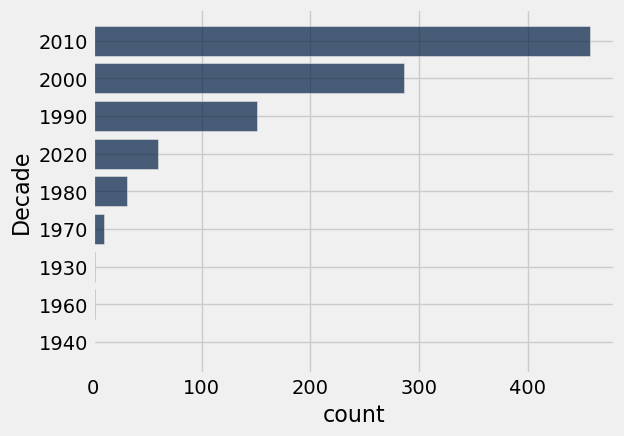

In [ ]:
decade_distribution.sort('count', descending=True).barh('Decade')

---

## Distributions of Numerical Variables

---

### Binning Numerical Values

Binning is counting the number of numerical values that lie within ranges, called bins.
* Bins are defined by their lower bounds (inclusive)
* The upper bound is the lower bound of the next bin

For example, the values 188, 170, 189, 163, 183, 171, 185, 168, 173, ... could be binned as follows:

<img src="./binning_example.png" alt="A binning of the example data" width = 80%>

---

### Demo: Binning

In [ ]:
top_movies

Title,Release Year,Decade,Gross,Gross (Adjusted)
Gone with the Wind,1939,1930,402382193,7.84414e+09
Bambi,1942,1940,267447150,4.44602e+09
Titanic,1997,1990,2201647264,3.71701e+09
Avatar,2009,2000,2922917914,3.69178e+09
Snow White and the Seven Dwarfs,1937,1930,184925486,3.47981e+09
Star Wars,1977,1970,775398007,3.46716e+09
Avengers: Endgame,2019,2010,2797501328,2.96506e+09
The Exorcist,1973,1970,441306145,2.69326e+09
Jaws,1975,1970,476512065,2.40001e+09
Star Wars: Episode VII - The Force Awakens,2015,2010,2069521700,2.36598e+09


In [ ]:
min_year = min(top_movies.column('Release Year'))
max_year = max(top_movies.column('Release Year'))
(min_year, max_year)

(1937, 2022)

---

Bin the release year data based on bins with unequal widths. We are using the `bin` table method to do this, but you will **not** typically work with the `bin` table method in our assignments/exams.

In [ ]:
unequally_spaced_bins = make_array(1937, 2000, 2010, 2020, 2022)

In [ ]:
top_movies.bin('Release Year', bins=unequally_spaced_bins)

bin,Release Year count
1937,197
2000,286
2010,457
2020,60
2022,0


The bin values represent the left-endpoint of the bin, except the last row bin value represents the right endpoint of the preceding bin.

---

Bin the release year data based on bins with equal width.

In [ ]:
binned_by_decade = top_movies.bin('Release Year', bins=np.arange(1930, 2031, 10))
binned_by_decade.show()

bin,Release Year count
1930,2
1940,1
1950,0
1960,2
1970,10
1980,31
1990,151
2000,286
2010,457
2020,60


---

## Area Principle

---

### Area Principle

Areas should be proportional to the values they represent.

* For example, if you represent 20% with ■, then 40% should be represented with twice that area ■■.
* The following visualization from [Gizmodo in 2012](https://gizmodo.com/holy-f-ck-the-new-ipad-has-a-gigantic-70-percent-large-5893738) accompanied the statement that the new iPad battery was "A gigantic 70-percent larger!" Does the visualization satisfy the area principle?

<img src="./ipad_battery_comparison.jpeg" alt="A comparison of iPad batteries that violates the Area Principle" width = 50%>

---

## Creating Histograms

---

### Histograms

* Chart that displays the distribution of a numerical variable
* Uses bins; there is one bar corresponding to each bin
* Uses the area principle: The area of each bar is the percent of individuals in the corresponding bin


---

### Demo: Histograms

Create a histogram of the release years using the default bins.

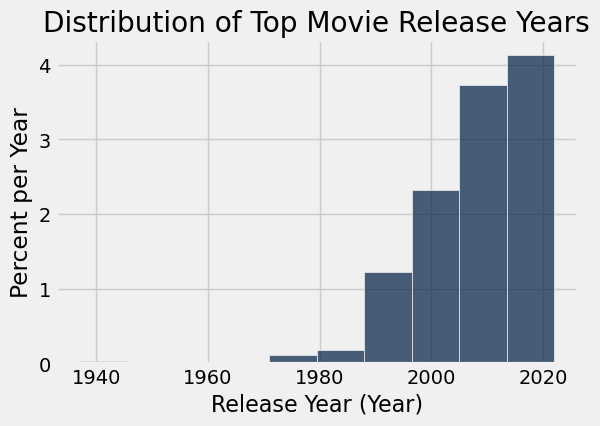

In [ ]:
top_movies.hist('Release Year', unit='Year')

# Formatting that you are not responsible for
plt.title('Distribution of Top Movie Release Years')
plt.show()

---

Now, use the unequally spaced bins.

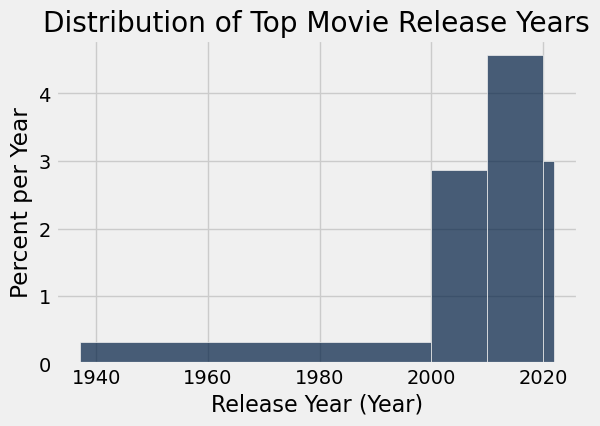

In [ ]:
top_movies.hist('Release Year', bins=unequally_spaced_bins, unit='Year')

# Formatting you are not responsible for
plt.title('Distribution of Top Movie Release Years')
plt.show()

---

Try using bins based on decades instead.

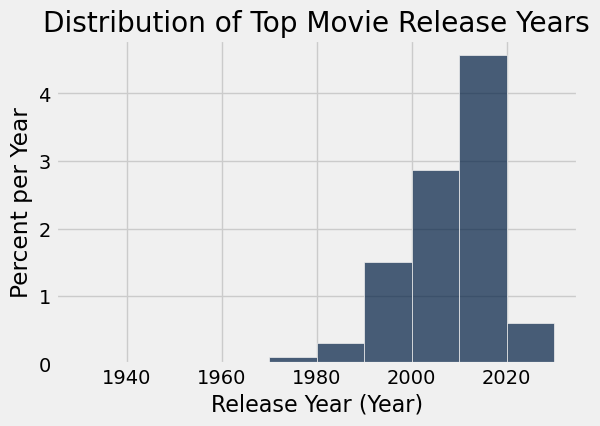

In [ ]:
top_movies.hist('Release Year', bins=np.arange(1930, 2031, 10), unit='Year')

# Formatting you are not responsible for
plt.title('Distribution of Top Movie Release Years')
plt.show()

---

## Density and Area

---

### Histogram Axes

* By default, `hist` uses a scale (`normed=True`) that ensures the area of the chart sums to 100%
* The area of each bar is a percentage of the whole
* The horizontal axis is a number line (e.g., years), and the bins sizes don't have to be equal to each other
* The vertical axis is a rate (e.g., percent per year)

---

### Demo: Density and Area

Add a new column to `binned_by_decade` containing the percentage of movies in each bin (decade) relative to the total number of movies in the data set.

In [ ]:
percents = binned_by_decade.column('Release Year count') / 1000 * 100
binned_by_decade = binned_by_decade.with_column('Percent', percents)
binned_by_decade

bin,Release Year count,Percent
1930,2,0.2
1940,1,0.1
1950,0,0
1960,2,0.2
1970,10,1
1980,31,3.1
1990,151,15.1
2000,286,28.6
2010,457,45.7
2020,60,6


In [ ]:
binned_by_decade.where('bin', 1990).column('Percent').item(0)

15.1

---

What is the height of the [1990, 2000) bin?

In [ ]:
percent = binned_by_decade.where('bin', 1990).column('Percent').item(0)
width = 2000 - 1990
height = percent / width
height

1.51

---

Use array arithmetic to calculate the rest of the heights.

In [ ]:
bin_lefts = binned_by_decade.take(np.arange(binned_by_decade.num_rows - 1))
bin_widths = np.diff(binned_by_decade.column('bin'))
bin_lefts = bin_lefts.with_column('Width', bin_widths)
bin_heights = bin_lefts.column('Percent') / bin_widths
bin_lefts = bin_lefts.with_column('Height', bin_heights)
bin_lefts

bin,Release Year count,Percent,Width,Height
1930,2,0.2,10,0.02
1940,1,0.1,10,0.01
1950,0,0,10,0
1960,2,0.2,10,0.02
1970,10,1,10,0.1
1980,31,3.1,10,0.31
1990,151,15.1,10,1.51
2000,286,28.6,10,2.86
2010,457,45.7,10,4.57
2020,60,6,10,0.6


---

### Height Measures Density

* The height measures the percent of data in the bin relative to the amount of space in the bin.
* The general formula for height is: $$\text{height } = \frac{\text{percent in bin}}{\text{width of bin}}$$
* Height measures crowdedness, or density.
* Units: percent per unit on the horizontal axis



---

### How to Calculate Height

The $[1990, 2000)$ bin contains $151$ out of $1,000$ movies
* $151$ out of $1000$ is $15.1\%$
* The bin is $2000 - 1990 = 10$ years wide
* The height of the bar is calculated to be: $$\frac{15.1 \text{ percent}}{10 \text{ years}} = 1.51 \text{ percent per year}$$


---

### Area Measures Percent

* The area of a bar is the percent in the bin.
* The area of a bar can be calculated by the formula: $\text{area of a bar } = \text{ height of the bar} \times \text{ width of bin}$.


---

### How to Calculate Area

A bin that is $10$ years wide and has a density of $1.51$ percent per year contains $10 * 1.51 = 15.1$ percent of the data.

---

### Area or Height

In general:
* Use area when addressing a question like "How many individuals in the bin?"
* Use height when addressing a question like "How crowded is the bin?"

---

### Bar Chart or Histogram?

* Use a bar chart to visualize when the:
    * Distribution of categorical variable
    * Bars have arbitrary (but equal) widths and spacings
    * Height (or length) and area of bars proportional to the percent of individuals
* Use a histogram to visualize when the:
    * Distribution of numerical variable
    * Horizontal axis is numerical: to scale, no gaps, bins can be unequal
    * Area of bars proportional to the percent of individuals; height measures density

---

## Attribution

This content is licensed under the <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License (CC BY-NC-SA 4.0)</a> and derived from the <a href="https://www.data8.org/">Data 8: The Foundations of Data Science</a> offered by the University of California, Berkeley.

<img src="./by-nc-sa.png" width=100px>